## Import Libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing CSV file
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import os
from PIL import Image

## Dataset Preprocessing

- Reshape to grayscale image &
- Split data into training and test sets
- Add emotional labels 

In [2]:
def read_png_to_gray_matrix(folder_path, processed_dataset):
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg'):
            file_path = os.path.join(folder_path, filename)
            image = Image.open(file_path)
            gray_matrix = image.convert('L')
            dic = {"label": label_generate(folder_path), "matrix": np.asarray(gray_matrix)}
            processed_dataset.append(dic)
    return processed_dataset

In [3]:

def label_generate(path):
    if path == train_data_path[0] or path == test_data_path[0]:
        label = "angry"
        return label
    if path == train_data_path[1] or path == test_data_path[1]:
        label = "disgust"
        return label
    if path == train_data_path[2] or path == test_data_path[2]:
        label = "fear"
        return label
    if path == train_data_path[3] or path == test_data_path[3]:
        label = "happy"
        return label
    if path == train_data_path[4] or path == test_data_path[4]:
        label = "neutral"
        return label
    if path == train_data_path[5] or path == test_data_path[5]:
        label = "sad"
        return label
    if path == train_data_path[6] or path == test_data_path[6]:
        label = "surprise"
        return label
    else:
        raise ValueError("Invalid path")


In [4]:
train_data_path = [
    '../setData/original_data_set/train/angry',
    '../setData/original_data_set/train/disgust',
    '../setData/original_data_set/train/fear',
    '../setData/original_data_set/train/happy',
    '../setData/original_data_set/train/neutral',
    '../setData/original_data_set/train/sad',
    '../setData/original_data_set/train/surprise'
]

test_data_path = [
    '../setData/original_data_set/test/angry',
    '../setData/original_data_set/test/disgust',
    '../setData/original_data_set/test/fear',
    '../setData/original_data_set/test/happy',
    '../setData/original_data_set/test/neutral',
    '../setData/original_data_set/test/sad',
    '../setData/original_data_set/test/surprise'
]


In [5]:
def process_train_data(train_data_path, write_path="../setData/processed_data_set/train/data.npy", test=True):
    processed_dataset = []
    for path in train_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)

    # Shuffle the training dataset
    np.random.shuffle(processed_dataset)

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:10])


def process_test_data(test_data_path, write_path="../setData/processed_data_set/test/data.npy", test=True):
    processed_dataset = []
    for path in test_data_path:
        # Assuming each path is a directory containing multiple PNG images
        processed_dataset = read_png_to_gray_matrix(path, processed_dataset)

    # Optionally shuffle the test dataset - usually, you wouldn't shuffle test data
    # np.random.shuffle(processed_dataset) # Commenting this out as it's typically not done for test sets

    # Save the processed dataset
    np.save(write_path, processed_dataset, allow_pickle=True)

    # Test output, can be set to False if not needed
    if test:
        check = np.load(write_path, allow_pickle=True)
        print(check[:5])

In [6]:
process_train_data(train_data_path)
process_test_data(test_data_path)

[{'label': 'sad', 'matrix': array([[ 38,  28,  21, ...,   2,   2,   2],
        [ 45,  59,  62, ...,   2,   2,   2],
        [ 58,  91,  88, ...,   2,   2,   2],
        ...,
        [159, 184, 141, ...,  89,  62,  42],
        [156, 151, 123, ...,  34,  27,  23],
        [175, 135,  73, ...,  23,  16,  12]], dtype=uint8)}
 {'label': 'fear', 'matrix': array([[ 85,  85,  85, ...,  46,  59,  40],
        [ 89,  89,  90, ...,  33,  57,  46],
        [ 92,  91,  93, ...,  24,  50,  57],
        ...,
        [117, 113, 109, ..., 115, 116, 129],
        [119, 114, 109, ..., 112, 115, 130],
        [121, 116, 110, ..., 123, 123, 134]], dtype=uint8)}
 {'label': 'neutral', 'matrix': array([[156, 129,  99, ..., 110, 103, 120],
        [212, 196, 138, ..., 117, 114, 123],
        [237, 234, 192, ..., 129, 129, 124],
        ...,
        [233, 226, 204, ..., 160, 167, 166],
        [232, 226, 204, ..., 162, 164, 170],
        [230, 225, 205, ..., 154, 152, 148]], dtype=uint8)}
 {'label': 'fear', '

## Dataset Visualization

In [7]:
# load training data from dataset
data_path = "../setData/processed_data_set/train/data.npy"
data = np.load(data_path, allow_pickle=True)

# convert dataset to dataframe
df = pd.DataFrame([{'emotion': d['label'], 'pixels': d['matrix'].flatten()} for d in data])

# check traning dataset shape & preview first 5 rows of training data
df.shape
df.head(5)


,emotion,pixels
0,sad,"[38, 28, 21, 13, 16, 15, 12, 12, 6, 4, 3, 6, 6..."
1,fear,"[85, 85, 85, 84, 84, 86, 84, 78, 85, 63, 41, 3..."
2,neutral,"[156, 129, 99, 81, 50, 60, 78, 85, 88, 78, 101..."
3,fear,"[185, 189, 185, 192, 155, 34, 43, 49, 66, 96, ..."
4,happy,"[98, 82, 70, 44, 35, 31, 21, 46, 72, 84, 98, 1..."


In [8]:
emotion_counts = df['emotion'].value_counts().reset_index()
emotion_counts.columns = ['emotion', 'number']
print(emotion_counts)

    emotion  number
0     happy    7215
1   neutral    4965
2       sad    4830
3      fear    4097
4     angry    3995
5  surprise    3171
6   disgust     436


/var/folders/6h/7snzfhy12zq8rv3fvwh7h4b80000gn/T/ipykernel_3916/1779081672.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)


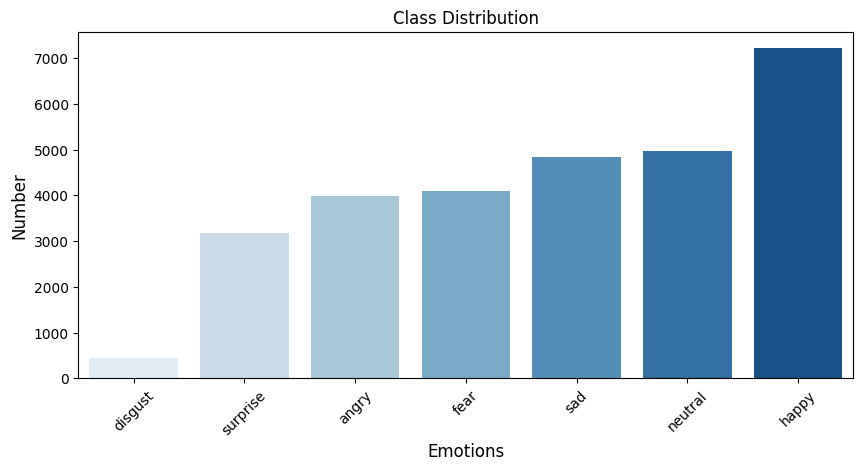

In [9]:
# Sort emotions by the number of images
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Generate a gradient of colors from light blue to blue
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

# Plotting the bar graph with sorted emotions and gradient colors
plt.figure(figsize=(10, 4.5))
sns.barplot(x='emotion', y='number', data=emotion_counts_sorted, palette=colors)
plt.title('Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.xticks(rotation=45) # If necessary, to improve label readability
plt.show()

## CNN Model

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

In [11]:
# CNN模型
def cnn_model(input_shape, num_classes):
    model = models.Sequential([
        # Convolutional and pooling layers
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        # Flattening the 3D outputs to 1D and adding dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Label to number mapping
def label_generate(label):
    labels_dict = {"angry": 0, "disgust": 1, "fear": 2, "happy": 3, 
                   "neutral": 4, "sad": 5, "surprise": 6}
    return labels_dict.get(label, None)


In [12]:
# Model parameters
input_shape = (48, 48, 1)
num_classes = 7

# Build the CNN model
model = cnn_model(input_shape, num_classes)

# Load data (paths may need to be adjusted based on your directory structure)
train_data_path = "../setData/processed_data_set/train/data.npy"
train_data = np.load(train_data_path, allow_pickle=True)
test_data_path = "../setData/processed_data_set/test/data.npy"
test_data = np.load(test_data_path, allow_pickle=True)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Prepare the data for training
image_matrix = np.array([item['matrix'] for item in train_data]).reshape(-1, 48, 48, 1)
labels = np.array([label_generate(item['label']) for item in train_data])
test_image_matrix = np.array([item['matrix'] for item in test_data]).reshape(-1, 48, 48, 1)
test_labels = np.array([label_generate(item['label']) for item in test_data])


/Users/ericsheng495/anaconda3/envs/facial-recog/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
# Train the model
history = model.fit(image_matrix, labels,
                    epochs=30,
                    batch_size=64,
                    validation_data=(test_image_matrix, test_labels))

# Save the model
model.save("model/trained_cnn_model.h5")

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.2173 - loss: 2.4597 - val_accuracy: 0.3594 - val_loss: 1.6343
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3424 - loss: 1.6704 - val_accuracy: 0.4086 - val_loss: 1.5180
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.3881 - loss: 1.5519 - val_accuracy: 0.4441 - val_loss: 1.4332
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4448 - loss: 1.4458 - val_accuracy: 0.4500 - val_loss: 1.4247
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4683 - loss: 1.3828 - val_accuracy: 0.4836 - val_loss: 1.3510
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.4974 - loss: 1.3219 - val_accuracy: 0.4762 - val_loss: 1.3689
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.5148 - loss: 1.2816 - val_accuracy: 0.4997 - val_loss: 1.3027
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.5439 - loss: 1.2113 - 

## Model Evaluation

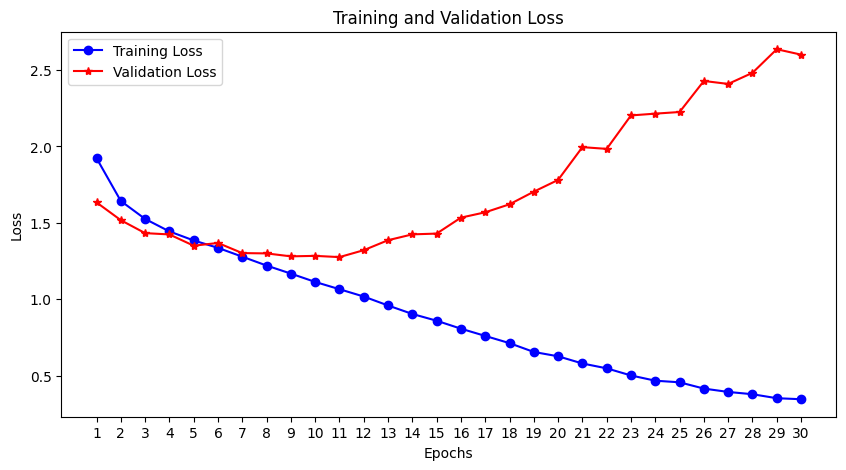

In [14]:
import matplotlib.pyplot as plt

# Plotting the loss for every 5th epoch
epochs = range(1, len(history.history['loss']) + 1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_loss, 'bo-', label='Training Loss')
plt.plot(epochs, validation_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs[::1])  # Show only every 5th epoch
plt.legend()
plt.show()

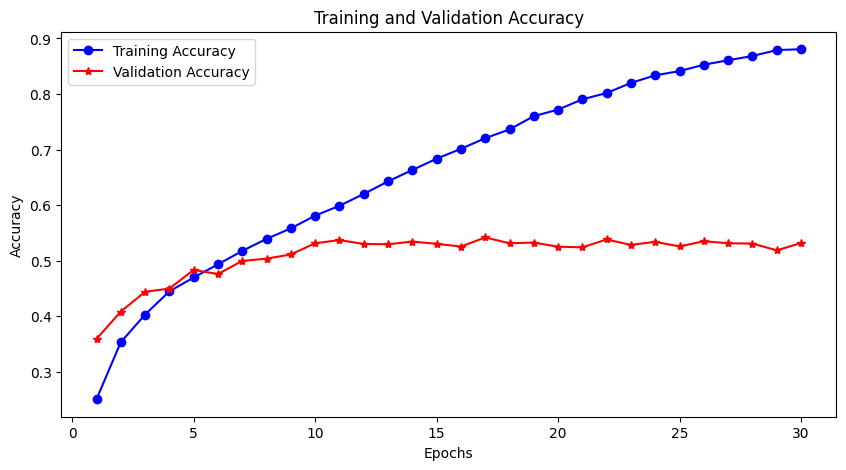

In [15]:
# Plotting the accuracy for each epoch
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()